In [9]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import random

In [10]:
bottle = pd.read_csv('bottle.csv')

In [11]:
bottle.head()

,T_degC,Salnty
0,9.74,34.460
1,10.90,33.566
2,12.70,33.403
3,9.59,33.377
4,17.10,34.220


<AxesSubplot:xlabel='T_degC', ylabel='Salnty'>

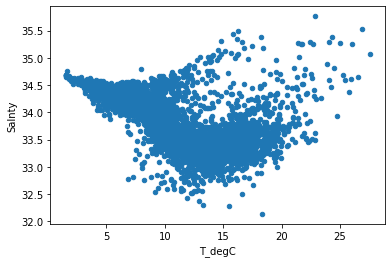

In [12]:
bottle.plot.scatter(x='T_degC', y='Salnty')

In [13]:
salnty = np.array(bottle['Salnty'])
temp = np.array(bottle['T_degC'])

### Question (a) 
#### Estimate conditional mean of sanlinity given temperature, and plot the conditional mean together with the scatter plot.


*Note:* Both salinity and temperature can be modeled with continous random variables. To simplify the conditional expectation, we discretize tempertures by bins with equal width. We then aggregate the salinity data within each bin. 

C:\Users\jason\AppData\Local\Programs\Python\Python39\lib\site-packages\numpy\core\fromnumeric.py:3440: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
C:\Users\jason\AppData\Local\Programs\Python\Python39\lib\site-packages\numpy\core\_methods.py:189: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


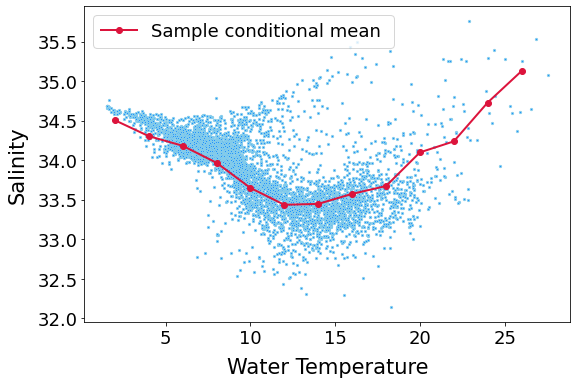

In [14]:
max_val = np.max(temp)
width_bin = 2
fig = plt.figure(figsize = (9,6)) 
plt.scatter(temp,salnty, s=5, c="dodgerblue", marker='o', edgecolor="skyblue")

# TODO: create bins from 0 to the maximum to discretize continous temperatures
grid = np.arange(0, 30, width_bin)

# TODO: Compute the conditional expection of sanlinity given temperture
cond_average_salnty = np.zeros(len(grid))
for i in range(len(grid)):
    if i < 14:
        cond_average_salnty[i] = np.mean(salnty[np.where((grid[i] < temp) & (temp < grid[i+1]))])
    else:
        cond_average_salnty[i] = np.mean(salnty[np.where((grid[i] < temp) & (temp < 30))])


plt.plot(grid[1:-1],cond_average_salnty[1:-1],'-o',lw=2,color='crimson', label="Sample conditional mean ")
plt.ylabel("Salinity", fontsize=21,labelpad=10)
plt.xlabel("Water Temperature", fontsize=21,labelpad=10)

plt.legend(fontsize=18)
# plt.xlim(-5,30)
# plt.ylim(-12,23)
plt.xticks(fontsize=18) 
plt.yticks(fontsize=18)
plt.gcf().subplots_adjust(bottom=0.15)
plt.gcf().subplots_adjust(left=0.15)
plt.savefig('conditional_expectation.pdf')

### Question (b)

#### Estimate conditional standard deviation, and plot the confidence interval within +/- one conditional standard deviation.

C:\Users\jason\AppData\Local\Programs\Python\Python39\lib\site-packages\numpy\core\_methods.py:262: RuntimeWarning: Degrees of freedom <= 0 for slice
  ret = _var(a, axis=axis, dtype=dtype, out=out, ddof=ddof,
C:\Users\jason\AppData\Local\Programs\Python\Python39\lib\site-packages\numpy\core\_methods.py:222: RuntimeWarning: invalid value encountered in true_divide
  arrmean = um.true_divide(arrmean, div, out=arrmean, casting='unsafe',
C:\Users\jason\AppData\Local\Programs\Python\Python39\lib\site-packages\numpy\core\_methods.py:254: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


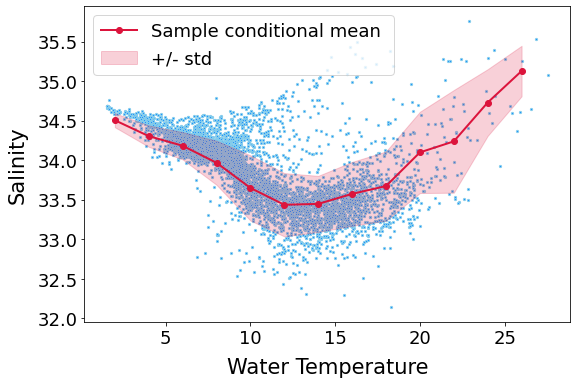

In [16]:
# TODO: Compute the conditional standard deviation of sanlinity given temperture
cond_std_salnty = np.zeros(len(grid))
for i in range(len(grid)):
    if i < 14:
        cond_std_salnty[i] = np.std(salnty[np.where((grid[i] < temp) & (temp < grid[i+1]))])
    else:
        cond_std_salnty[i] = np.std(salnty[np.where((grid[i] < temp) & (temp < 30))])
    
fig = plt.figure(figsize = (9,6)) 
plt.scatter(temp,salnty, s=5, c="dodgerblue", marker='o', edgecolor="skyblue")


plt.plot(grid[1:-1],cond_average_salnty[1:-1],'-o',lw=2,color='crimson', label="Sample conditional mean ")
plt.fill_between(grid[1:-1], cond_average_salnty[1:-1]-cond_std_salnty[1:-1], 
                cond_average_salnty[1:-1]+cond_std_salnty[1:-1], color='crimson', alpha=0.2, label="+/- std")

plt.ylabel("Salinity", fontsize=21,labelpad=10)
plt.xlabel("Water Temperature", fontsize=21,labelpad=10)

plt.legend(fontsize=18)
plt.xticks(fontsize=18) 
plt.yticks(fontsize=18)
plt.gcf().subplots_adjust(bottom=0.15)
plt.gcf().subplots_adjust(left=0.15)
plt.savefig('conditional_expectation_w_std.pdf')